In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [83]:
def Vectorize_Class(ls_general_labels,ls_fine_labels):
    import numpy as np
    train_y_general_class = []
    train_y_fine_class = []
    train_y_general_fine_class = []
        
    Constant = [4,30,55,72,95,1,32,67,73,91,54,62,70,82,92,9,10,16,28,61,0,51,53,57,83,22,39,40,86,87,5,20,25,84,94,6,7,14,18,24,3,42,43,88,97,12,17,37,68,76,23,33,49,60,71,15,19,21,31,38,34,63,64,66,75,26,45,77,79,99,2,11,35,46,98,27,29,44,78,93,36,50,65,74,80,47,52,56,59,96,8,13,48,58,90,41,69,81,85,89]
    Constant = np.array(Constant)
    
    
    i=0
    while i<len(ls_general_labels):
        null_general_class=[0]*20
        null_fine_class=[0]*100
        null_general_fine_class=[0]*25
        
        null_general_class[ls_general_labels[i]]=1
        null_general_class = np.array(null_general_class)
        train_y_general_class.append(null_general_class)
        
        #new_index = np.where(A==ls_fine_labels[i])[0][0]
        null_fine_class[np.where(Constant==ls_fine_labels[i])[0][0]]=1
        null_fine_class = np.array(null_fine_class)
        train_y_fine_class.append(null_fine_class)
        
        null_general_fine_class[ls_general_labels[i]]=1
        null_general_fine_class[20+np.where(Constant==ls_fine_labels[i])[0][0]%5]=1
        null_general_fine_class = np.array(null_general_fine_class)
        train_y_general_fine_class.append(null_general_fine_class)
        i+=1
        
    train_y_general_class = np.array(train_y_general_class)
    train_y_fine_class = np.array(train_y_fine_class)
    train_y_general_fine_class = np.array(train_y_general_fine_class)
    
    return train_y_general_class, train_y_fine_class, train_y_general_fine_class

In [82]:
def create_featureset(train_file,test_file):
    

    data = unpickle(train_file)
    General_Labels = data[b'coarse_labels']
    train_x = data[b'data']
    Fine_Labels = data[b'fine_labels']

    train_y_General, train_y_Fine, train_y_General_fine = Vectorize_Class(General_Labels,Fine_Labels)
        
    data = unpickle(test_file)
    General_Labels = data[b'coarse_labels']
    test_x = data[b'data']
    Fine_Labels = data[b'fine_labels'] 
        
    test_y_General, test_y_Fine, test_y_General_fine = Vectorize_Class(General_Labels,Fine_Labels)
    
    return train_x, train_y_General, train_y_Fine, train_y_General_fine, test_x, test_y_General, test_y_Fine, test_y_General_fine

In [84]:
def pickle_data(train_x, train_y_General, train_y_Fine, train_y_General_fine, test_x, test_y_General, test_y_Fine, test_y_General_fine, Name):
    import pickle
    final_list = {'train_x':train_x, 'train_y_General':train_y_General, 'train_y_Fine':train_y_Fine, 'train_y_General_fine':train_y_General_fine, 'test_x':test_x, 'test_y_General':test_y_General, 'test_y_Fine':test_y_Fine, 'test_y_General_fine':test_y_General_fine}
    with open(Name,'wb') as f:
        pickle.dump(final_list,f)

In [85]:
train_x, train_y_General, train_y_Fine, train_y_General_fine, test_x, test_y_General, test_y_Fine, test_y_General_fine = create_featureset("cifar-100/train","cifar-100/test")

In [94]:
pickle_data(train_x, train_y_General, train_y_Fine, train_y_General_fine, test_x, test_y_General, test_y_Fine, test_y_General_fine, "cifar-100-RGB")

In [95]:
import numpy as np
train_xR=[]
train_xG=[]
train_xB=[]
i=0
while i<len(train_x):
    train_xR.append(train_x[i][0:1024])
    train_xG.append(train_x[i][1024:2048])
    train_xB.append(train_x[i][2048:3072])
    i+=1
test_xR=[]
test_xG=[]
test_xB=[]
i=0
while i<len(test_x):
    test_xR.append(test_x[i][0:1024])
    test_xG.append(test_x[i][1024:2048])
    test_xB.append(test_x[i][2048:3072])
    i+=1
    
train_xR = np.array(train_xR)
train_xG = np.array(train_xG)
train_xB = np.array(train_xB)
test_xR = np.array(test_xR)
test_xG = np.array(test_xG)
test_xB = np.array(test_xB)

In [96]:
Gray_Train = np.array(0.2989 * train_xR + 0.5870 * train_xG + 0.1140 * train_xB,'int')
Gray_Test = np.array(0.2989 * test_xR + 0.5870 * test_xG + 0.1140 * test_xB,'int')

In [97]:
pickle_data(Gray_Train, train_y_General, train_y_Fine, train_y_General_fine, Gray_Test, test_y_General, test_y_Fine, test_y_General_fine, "cifar-100-Gray")

In [98]:
def plot_image_and_print_class(x,y):
    import numpy as np
    import matplotlib.pyplot as plt
    image=[]
    i=0
    while i<32:
        row=[]
        j=0
        while j<32:
            cell=[]
            k=0
            while k<3:
                cell.append(np.array(x[k*1024+i*32+j]))
                k+=1
            j+=1
            row.append(np.array(cell))
        i+=1
        image.append(np.array(row))
    

    plt.figure(figsize=(1.2, 1.2))
    plt.imshow(np.array(image))
    
    plt.show()
    print("class",y)

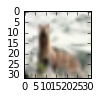

class 0


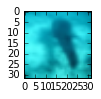

class 1


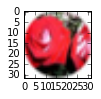

class 2


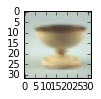

class 3


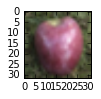

class 4


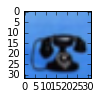

class 5


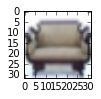

class 6


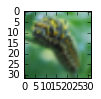

class 7


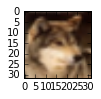

class 8


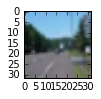

class 9


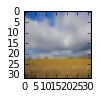

class 10


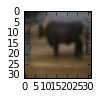

class 11


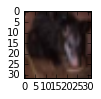

class 12


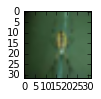

class 13


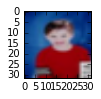

class 14


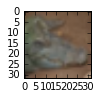

class 15


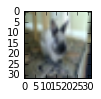

class 16


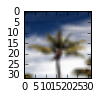

class 17


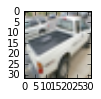

class 18


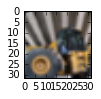

class 19


In [100]:
import numpy as np
i=0
j=0

while i<20:
    if np.argmax(train_y_General[j])==i:
        plot_image_and_print_class(train_x[j],i)
        i+=1
    j+=1

In [101]:
def plot_gray_image_and_print_class(x,y):
    import numpy as np
    import matplotlib.pyplot as plt
    image=[]
    i=0
    while i<32:
        row=[]
        j=0
        while j<32:
            cell=[]
            k=0
            while k<3:
                cell.append(np.array(x[i*32+j]))
                k+=1
            j+=1
            row.append(np.array(cell))
        i+=1
        image.append(np.array(row))
    

    plt.figure(figsize=(1.2, 1.2))
    plt.imshow(np.array(image))
    
    plt.show()
    print("class",y)

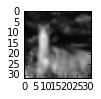

class 0


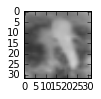

class 1


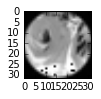

class 2


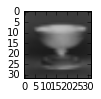

class 3


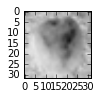

class 4


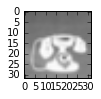

class 5


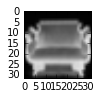

class 6


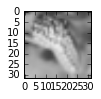

class 7


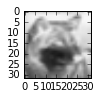

class 8


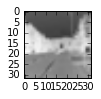

class 9


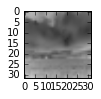

class 10


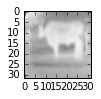

class 11


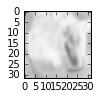

class 12


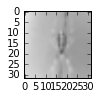

class 13


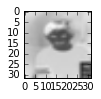

class 14


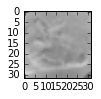

class 15


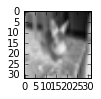

class 16


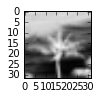

class 17


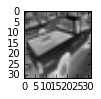

class 18


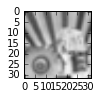

class 19


In [103]:
import numpy as np
i=0
j=0
while i<20:
    if np.argmax(train_y_General[j])==i:
        plot_gray_image_and_print_class(Gray_Train[j],i)
        i+=1
    j+=1